In [24]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height.csv");df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df.Gender)

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
x = df.drop(['Gender'],axis=1); y = df.Gender

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest, ytrain,ytest=train_test_split(x,y,train_size=.70,random_state=42)

In [11]:
xtrain

,Height,Weight
553,67.594031,186.751417
1397,71.601697,211.031652
7934,62.625985,143.768451
8367,66.136131,151.814648
3320,71.843308,196.505814
...,...,...
5734,63.349988,139.223151
5191,58.861625,90.728561
5390,64.325406,156.800504
860,69.074492,179.386817


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [13]:
knn_clf.fit(xtrain,ytrain)

KNeighborsClassifier()

In [14]:
clf_pred = knn_clf.predict(xtest);clf_pred

array([0, 1, 1, ..., 0, 1, 0])

# Evaluate Model

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [16]:
accuracy_score(ytest,clf_pred)

0.9131281651733542

In [17]:
confusion_matrix(ytest,clf_pred)

array([[ 945,  121],
       [ 102, 1399]], dtype=int64)

In [18]:
print(classification_report(ytest,clf_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



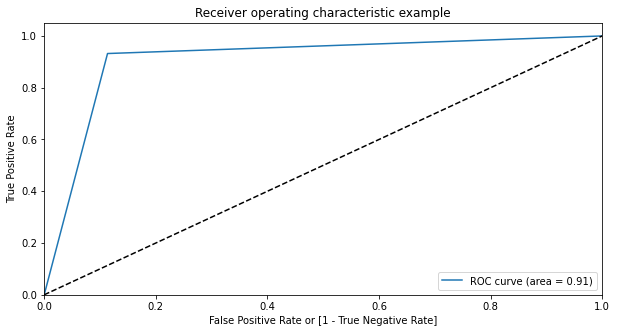

In [28]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve( ytest, clf_pred, drop_intermediate = False )

draw_roc(ytest, clf_pred)

# Tuning

In [30]:
def absoluteError(x_t,y_t,modelInput):
    predict = modelInput.predict(x_t)
    errors = y_t-predict
    return sum(abs(errors))

In [31]:
from sklearn.ensemble import RandomForestClassifier

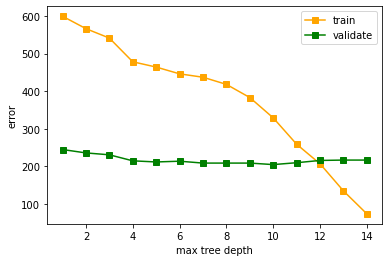

In [36]:
err = []
errIndex = []
errTest = []
for treedepth in range(1,15):
    clf = RandomForestClassifier(random_state=2345,max_depth=treedepth)
    model = clf.fit(xtrain,ytrain)
    err.append(absoluteError(xtrain,ytrain,model))
    errTest.append(absoluteError(xtest,ytest,model))
    errIndex.append(treedepth)

fig, ax = plt.subplots()
ax.plot(errIndex,err,'rs-', color="orange",linewidth=1.5)
ax.plot(errIndex,errTest,'rs-', color='green',linewidth=1.5)
ax.set_xlabel("max tree depth")
ax.set_ylabel("error")
plt.legend(['train','validate'])

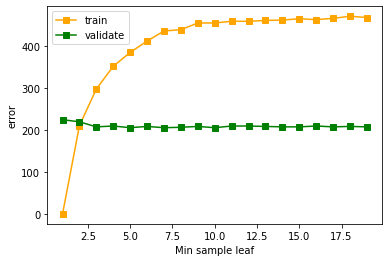

In [38]:
err = []
errIndex = []
errTest = []
for leaf in range(1,20):
    clf = RandomForestClassifier(random_state=2345,min_samples_leaf=leaf)
    model = clf.fit(xtrain,ytrain)
    err.append(absoluteError(xtrain,ytrain,model))
    errTest.append(absoluteError(xtest,ytest,model))
    errIndex.append(leaf)

fig, ax = plt.subplots()
ax.plot(errIndex,err,'rs-', color="orange",linewidth=1.5)
ax.plot(errIndex,errTest,'rs-', color='green',linewidth=1.5)
ax.set_xlabel("Min sample leaf")
ax.set_ylabel("error")
plt.legend(['train','validate'])

In [39]:
grids = {
    'n_estimators': [int(x) for x in np.linspace(1,30)],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[10],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': [15],
    'criterion':['gini','entropy']
}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
rf_clf = RandomForestClassifier()

In [42]:
rmcv = RandomizedSearchCV(estimator=rf_clf, param_distributions=grids,error_score='raise')

In [43]:
rmcv

RandomizedSearchCV(error_score='raise', estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [1, 1, 2, 2, 3, 3, 4, 5,
                                                         5, 6, 6, 7, 8, 8, 9, 9,
                                                         10, 11, 11, 12, 12, 13,
                                                         14, 14, 15, 15, 16, 16,
                                                         17, 18, ...]})

In [44]:
rmcv.fit(xtrain,ytrain)

RandomizedSearchCV(error_score='raise', estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [1, 1, 2, 2, 3, 3, 4, 5,
                                                         5, 6, 6, 7, 8, 8, 9, 9,
                                                         10, 11, 11, 12, 12, 13,
                                                         14, 14, 15, 15, 16, 16,
                                                         17, 18, ...]})

In [45]:
rmcv.best_params_

{'n_estimators': 29,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [46]:
knc = KNeighborsClassifier(n_neighbors=29)

In [47]:
knc.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=29)

In [48]:
knclf_pred = knc.predict(xtest)
knclf_pred

array([0, 1, 1, ..., 0, 1, 0])

In [49]:
accuracy_score(ytest,knclf_pred)

0.9193611219322166

In [51]:
confusion_matrix(ytest,knclf_pred)

array([[ 956,  110],
       [  97, 1404]], dtype=int64)

In [58]:
print(classification_report(ytest,knclf_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1066
           1       0.93      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



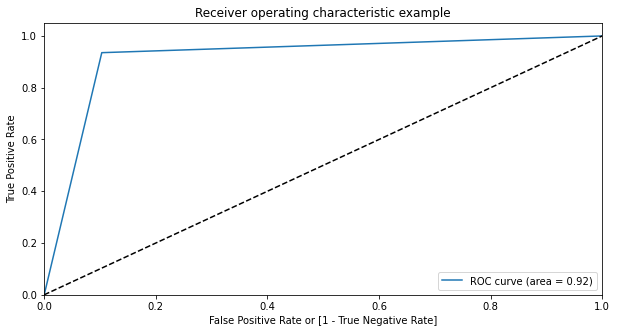

In [83]:
fpr, tpr, thresholds = roc_curve( ytest, knclf_pred, drop_intermediate = False )

draw_roc(ytest, knclf_pred)

# Compare accuracy with default KNN and After tuning K value

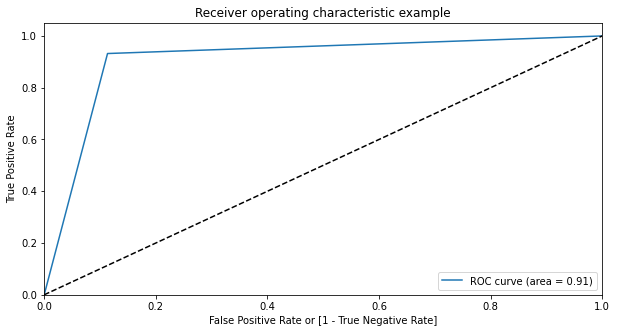

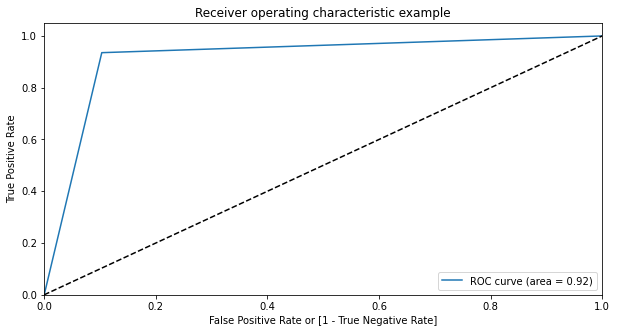

In [84]:
fpr, tpr, thresholds = roc_curve( ytest, clf_pred, drop_intermediate = False )

draw_roc(ytest, clf_pred)

fpr, tpr, thresholds = roc_curve( ytest, knclf_pred, drop_intermediate = False )

draw_roc(ytest, knclf_pred)

# Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report) and Compare with Old KNN model

In [77]:
print("old knn",classification_report(ytest,clf_pred))

old knn               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [71]:
print("After tuning",classification_report(ytest,knclf_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1066
           1       0.93      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [78]:
import seaborn as sns

<AxesSubplot:>

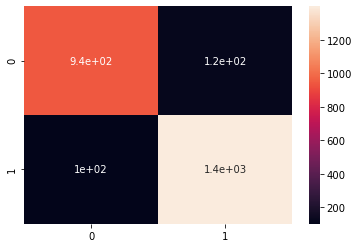

In [80]:
cm = confusion_matrix(ytest,clf_pred)
sns.heatmap(cm,annot=True)

<AxesSubplot:>

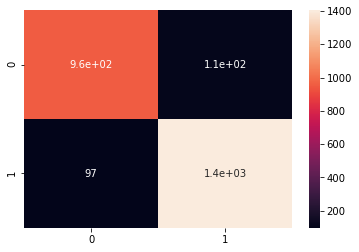

In [79]:
cm2 = confusion_matrix(ytest,knclf_pred)
sns.heatmap(cm2,annot=True)

In [81]:
accuracy_score(ytest,clf_pred)

0.9131281651733542

In [82]:
accuracy_score(ytest,knclf_pred)

0.9193611219322166